## Exploratory Data Analysis
### What we are interested in discovering
* What's the average revenue per neighbourhood group?
* What neighbourhood groups have the highest bookings?
* How much revenue does each room type bring in?
* What are the top 10 highest revenue neighbourhoods?

Here is the [link](https://public.tableau.com/views/AirBnBNYCAnalysis_16631575125700/Dashboard1?:language=en-GB&:display_count=n&:origin=viz_share_link) to the final Tableau dashboard that visualizes these findings.

In [82]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("airbnb_cleaned.csv")
data.head()

,id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,193.0,10,9,2021-10-19,0.21,4.0,6,286
1,1002102,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,28.0,30,45,2022-05-21,0.38,4.0,2,228
2,1002755,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005,368.0,74.0,30,270,2019-07-05,4.64,4.0,1,322
3,1003689,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,41.0,10,9,2018-11-19,0.10,3.0,1,289
4,1004098,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,577.0,115.0,3,74,2019-06-22,0.59,3.0,1,374


In [5]:
data.shape

(84331, 19)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84331 entries, 0 to 84330
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              84331 non-null  int64  
 1   host_identity_verified          84331 non-null  object 
 2   neighbourhood group             84331 non-null  object 
 3   neighbourhood                   84331 non-null  object 
 4   lat                             84331 non-null  float64
 5   long                            84331 non-null  float64
 6   instant_bookable                84331 non-null  bool   
 7   cancellation_policy             84331 non-null  object 
 8   room type                       84331 non-null  object 
 9   Construction year               84331 non-null  int64  
 10  price                           84331 non-null  float64
 11  service fee                     84331 non-null  float64
 12  minimum nights                  

There is still some cleaning to be done. We start with converting the column names to a common format. All lowercase with an underscore between words.

In [7]:
data.columns=[col.lower().replace(" ","_") for col in data.columns]
data.columns

Index(['id', 'host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'lat', 'long', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Let's start exploring the columns. We'll start with the categorical ones.

In [23]:
data['host_identity_verified'].value_counts()

unconfirmed    42199
verified       42132
Name: host_identity_verified, dtype: int64

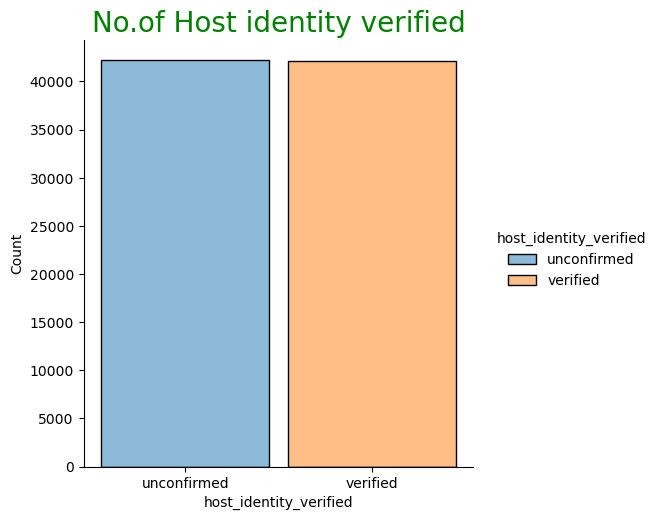

In [24]:
sns.displot(data,x="host_identity_verified", hue="host_identity_verified", shrink=0.9);
plt.title("No.of Host identity verified", size=20, color="green");

In [25]:
data['neighbourhood_group'].value_counts()

Brooklyn         35001
Manhattan        34969
Queens           11236
Bronx             2295
Staten Island      829
brookln              1
Name: neighbourhood_group, dtype: int64

We'll fix the typo in brookln

In [28]:
data.loc[data['neighbourhood_group']=='brookln', 'neighbourhood_group'] = 'Brooklyn'
data['neighbourhood_group'].value_counts()

Brooklyn         35002
Manhattan        34969
Queens           11236
Bronx             2295
Staten Island      829
Name: neighbourhood_group, dtype: int64

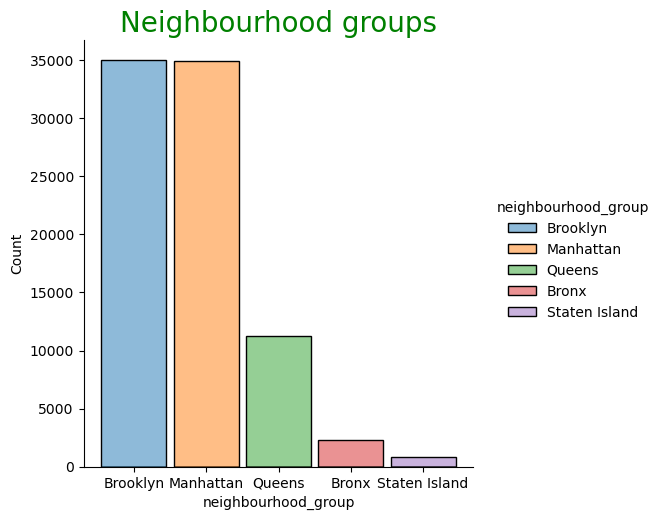

In [29]:
sns.displot(data,x="neighbourhood_group", hue="neighbourhood_group", shrink=0.9);
plt.title("Neighbourhood groups", size=20, color="green");

We can immediately see that most of the listings are in Brooklyn and Manhattan

In [33]:
data['instant_bookable'].value_counts()

False    42368
True     41963
Name: instant_bookable, dtype: int64

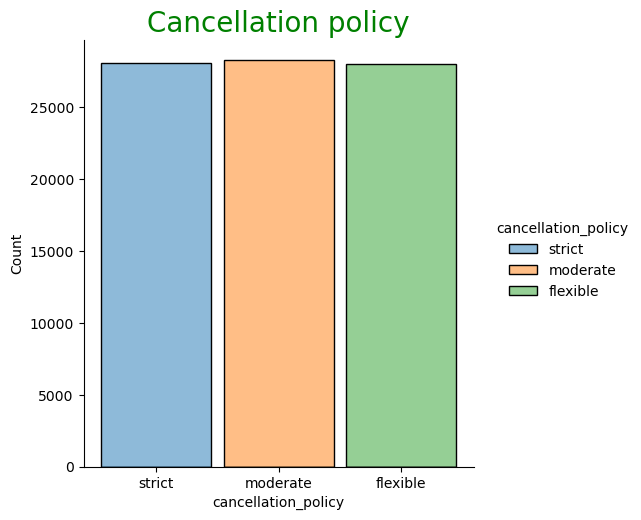

In [34]:
sns.displot(data,x="cancellation_policy", hue="cancellation_policy", shrink=0.9);
plt.title("Cancellation policy", size=20, color="green");

In [60]:
room_type = data["room_type"].value_counts()
fig = px.pie(values=room_type.values,
          names=room_type.index,
          title="Room type distribution", template="presentation")
fig.update_traces(textinfo="label+percent+value", textfont_size=13)
fig.show()

In [49]:
data['review_rate_number'].value_counts()

5.0    19238
3.0    19175
4.0    19116
2.0    19108
1.0     7453
Name: review_rate_number, dtype: int64

Now let's look at the numerical columns.

In [11]:
data['minimum_nights'].describe()

count    84331.000000
mean         7.416514
std         27.980464
min       -365.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       5645.000000
Name: minimum_nights, dtype: float64

Minimum number of nights should be 0 and maximum 365 so we need to clean this column up.

For any value less than 0, we set it to zero.

In [37]:
data['minimum_nights'].loc[data['minimum_nights'] < 0] = 0

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_25556/2410406239.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    84331.000000
mean         7.425265
std         27.937996
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       5645.000000
Name: minimum_nights, dtype: float64

For outliers we'll use z-scores

In [42]:
z = np.abs(stats.zscore(data['minimum_nights']))
threshold = 3
data = data[(z < 3)]
data['minimum_nights'].describe()

count    84090.000000
mean         6.699156
std         10.416112
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         91.000000
Name: minimum_nights, dtype: float64

We'll need to perform similar operations on the availability 365 column.
For numbers below zero, we'll replace with zero. For numbers above 365, we'll replace with 365

In [43]:
data['availability_365'].describe()

count    84090.000000
mean       141.545166
std        133.888429
min        -10.000000
25%          6.000000
50%        100.000000
75%        266.000000
max       3677.000000
Name: availability_365, dtype: float64

In [45]:
data['availability_365'].loc[data['availability_365'] < 0] = 0
data['availability_365'].loc[data['availability_365'] > 365] = 365

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_25556/2139557911.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_25556/2139557911.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Feature engineering to derive more insights
* Days booked = 365 - days available
* Revenue = price * days available

### With these figures we can look at
* Average revenue per neighbourhood
* Average days booked per neighbourhood

In [ ]:
data['availability_365'] = (365 - data['availability_365'])
data.rename(columns={'availability_365': 'days_booked'},inplace=True)

In [67]:
data['revenue'] = data['price'] * data['days_booked']
data['revenue'].dtype
data.head()

,id,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,revenue
0,1001254,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,193.0,10,9,2021-10-19,0.21,4.0,6,79,76314.0
1,1002102,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,28.0,30,45,2022-05-21,0.38,4.0,2,137,19454.0
2,1002755,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005,368.0,74.0,30,270,2019-07-05,4.64,4.0,1,43,15824.0
3,1003689,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,41.0,10,9,2018-11-19,0.10,3.0,1,76,15504.0
4,1004098,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,577.0,115.0,3,74,2019-06-22,0.59,3.0,1,0,0.0


<AxesSubplot:title={'center':'Average revenue, per Neighbourhood group'}, xlabel='neighbourhood_group', ylabel='Average Revenue'>

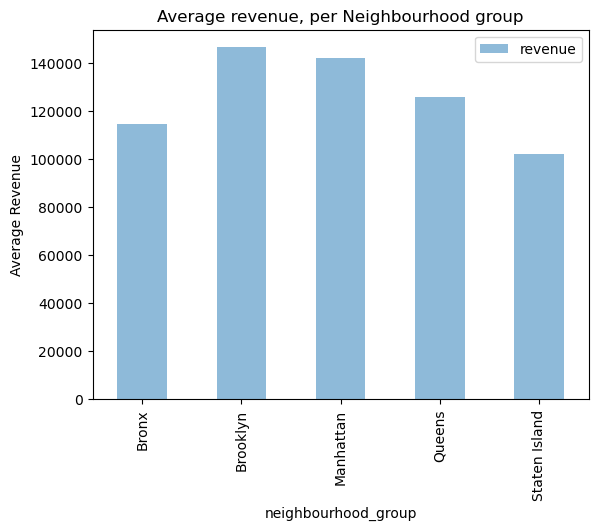

In [86]:
avg_revenue = data['revenue'].groupby(data['neighbourhood_group']).mean()
avg_revenue.plot.bar(title='Average revenue, per Neighbourhood group',ylabel='Average Revenue',alpha=0.5,legend=True)

<AxesSubplot:title={'center':'Days booked, per Neighbourhood group'}, xlabel='neighbourhood_group', ylabel='Average Days Booked'>

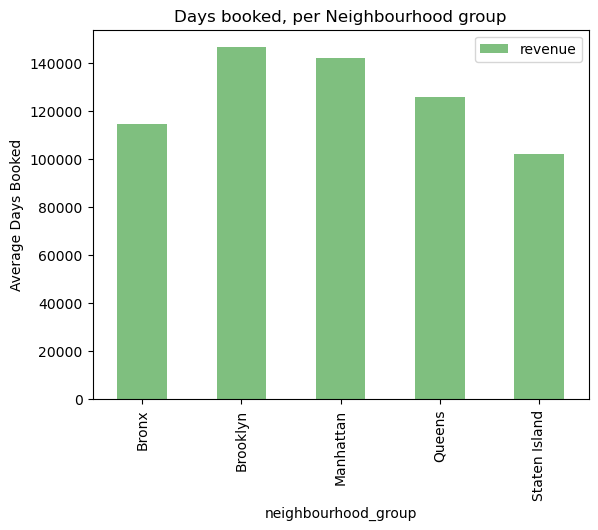

In [89]:
from turtle import color


avg_days_booked = data['days_booked'].groupby(data['neighbourhood_group']).mean()
avg_revenue.plot.bar(title='Days booked, per Neighbourhood group',ylabel='Average Days Booked',alpha=0.5,legend=True, color='g')

So Brooklyn and Manhattan are the best placed to have a listing because they are the most booked and bring in the most revenue.

Let's investigate correlations. We'll remove some columns to make the following parts easier.

In [70]:
columns_to_remove = ['id', 'instant_bookable', 'lat', 'long', 'construction_year', 'calculated_host_listings_count']
data_copy = data.drop(columns=columns_to_remove)

,host_identity_verified,neighbourhood_group,neighbourhood,cancellation_policy,room_type,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,days_booked,revenue
0,unconfirmed,Brooklyn,Kensington,strict,Private room,966.0,193.0,10,9,2021-10-19,0.21,4.0,79,76314.0
1,verified,Manhattan,Midtown,moderate,Entire home/apt,142.0,28.0,30,45,2022-05-21,0.38,4.0,137,19454.0
2,unconfirmed,Brooklyn,Clinton Hill,moderate,Entire home/apt,368.0,74.0,30,270,2019-07-05,4.64,4.0,43,15824.0
3,verified,Manhattan,East Harlem,moderate,Entire home/apt,204.0,41.0,10,9,2018-11-19,0.10,3.0,76,15504.0
4,verified,Manhattan,Murray Hill,flexible,Entire home/apt,577.0,115.0,3,74,2019-06-22,0.59,3.0,0,0.0


<AxesSubplot:>

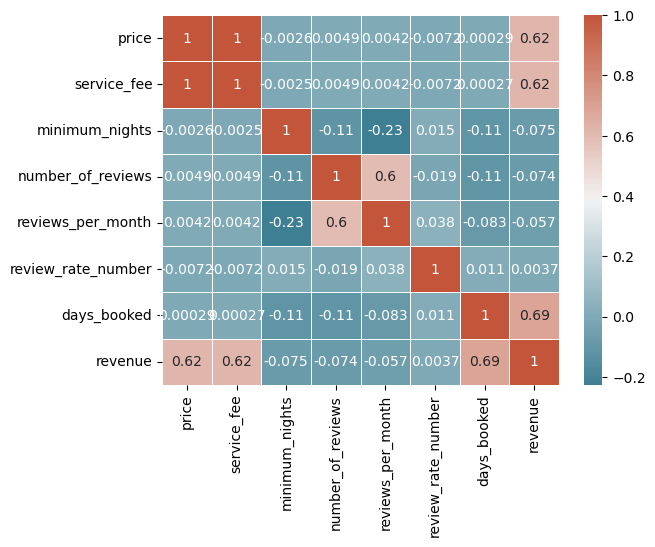

In [72]:
corr = data_copy.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidths=0.4)

Noteable correlations are between:
* price and service fee
* minimum nights and reviews per month
* number of reviews and reviews per month
* price and revenue
* service fee and revenue
* days booked and revenue

Lets explore some of these relationships

<AxesSubplot:title={'center':'Relationship between price and service fee'}, xlabel='price', ylabel='service_fee'>

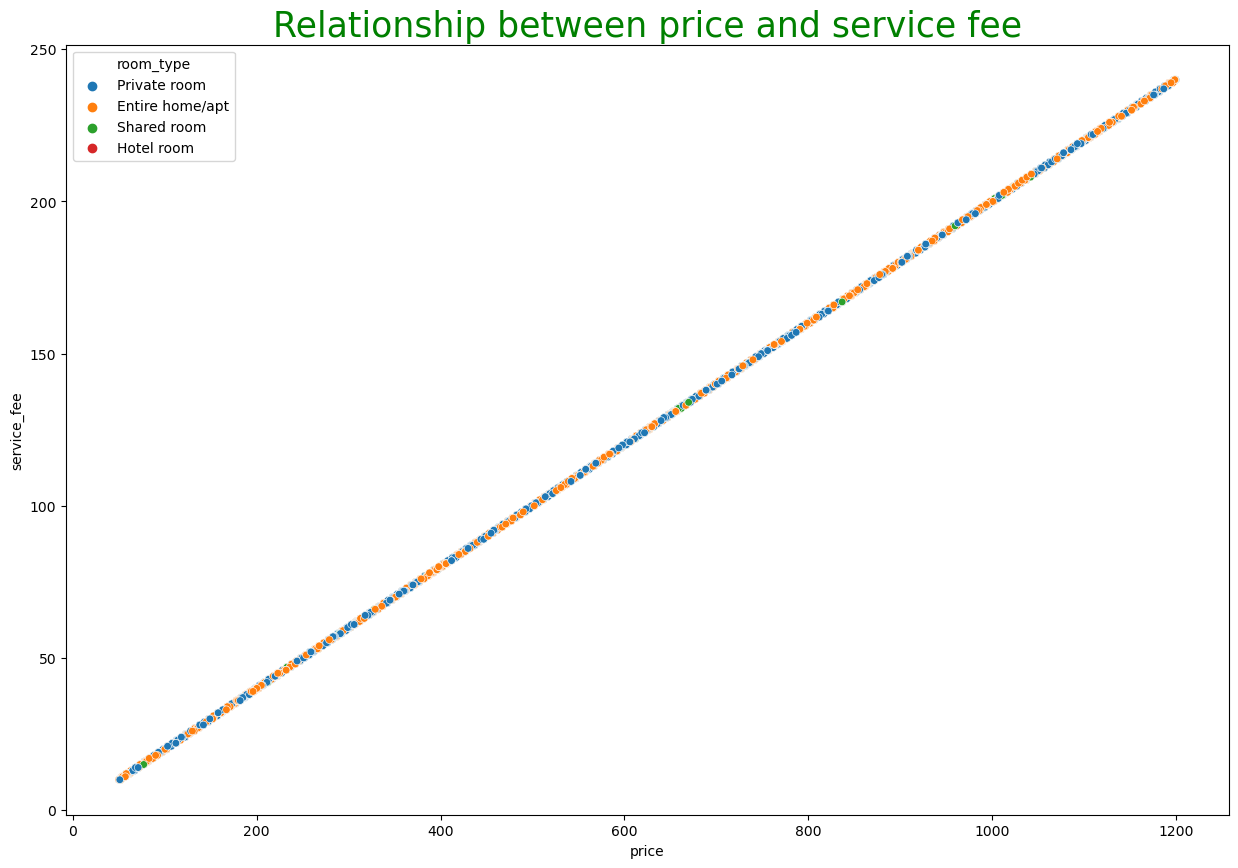

In [92]:
plt.figure(figsize=(15,10))
plt.title("Relationship between price and service fee", size=25, color="green")
sns.scatterplot(x=data_copy['price'], y=data_copy['service_fee'], hue=data_copy['room_type'], s=30)

There is a perfect linear correlation between price and service fee. The higher the price, the higher the service fee.

<AxesSubplot:title={'center':'Relationship between minimum nights and reviews per month'}, xlabel='minimum_nights', ylabel='reviews_per_month'>

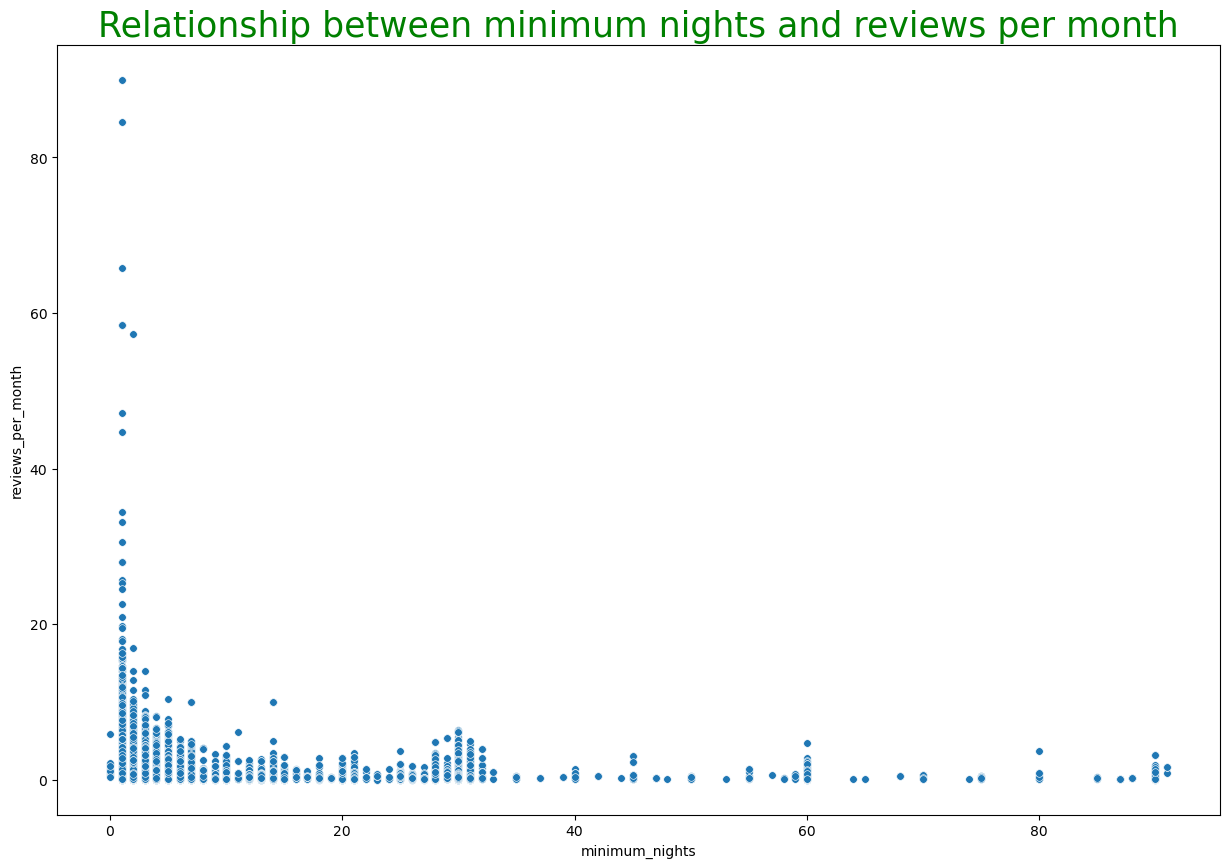

In [96]:
plt.figure(figsize=(15,10))
plt.title("Relationship between minimum nights and reviews per month", size=25, color="green")
sns.scatterplot(x=data_copy['minimum_nights'], y=data_copy['reviews_per_month'], s=30)

There is no obvious relationship here.

Lastly, we'll export the data to be used in a BI tool like Tableau. We'll return some of the columns we had removed earlier as it would be interesting to visualize them.

In [110]:
data_final = data_copy.copy()
data_final['construction_year'] = data['construction_year']
data_final['instant_bookable'] = data['instant_bookable']
data_final['latitude'] = data['lat']
data_final['longitude'] = data['long']
data_final.to_csv("airbnb_eda.csv", index=False)

[Link](https://public.tableau.com/views/AirBnBNYCAnalysis_16631575125700/Dashboard1?:language=en-GB&:display_count=n&:origin=viz_share_link) to the Tableau dashboard